<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3445692586.py:14: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Variance explained by the principle components: [0.46757068 0.11782371]
Ratio of variance explained:  0.585394391742112


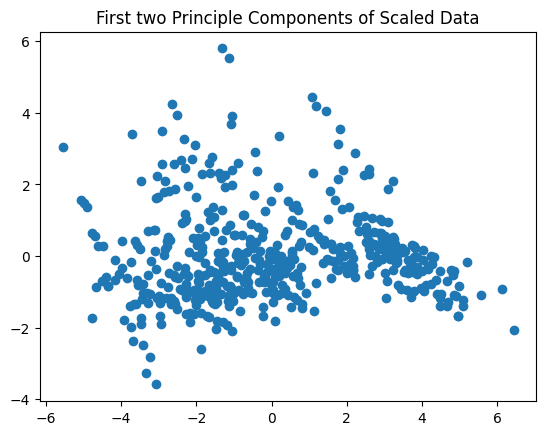

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# first we load the data and print description
# `load_boston` has been removed from scikit-learn since version 1.2.
# Fetching the dataset from the original source as suggested in the error message.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# The original `load_boston` provided 13 features and 1 target.
# The raw data format is interleaved, so we extract data and target.
# data: first 11 columns from even rows, and next 2 columns from odd rows.
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Standard feature names for the Boston Housing dataset
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['TARGET'] = target

# we rescale the data by substracting the mean value and dividing by the standard deviation
# this is known as z-score standardization
# The problem statement mentions clustering "all fourteen columns", so 'TARGET' is included.
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(boston_df)

# principle component analysis computes a linear transformation such that the
# few dimensions of the data explain the majority of the variance
# this can be used to visualize data in 2d, even though there are more dimensions
# the problem is: we do not know what the dimensions mean, because they are not our features
pca = decomposition.PCA(n_components=2)
boston_pca = pca.fit_transform(boston_scaled)
print("Variance explained by the principle components:", pca.explained_variance_ratio_)
print("Ratio of variance explained: ", sum(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(x=boston_pca[:,0], y=boston_pca[:,1])
plt.title("First two Principle Components of Scaled Data")
plt.show()